PERBANDINGAN RANDOM FOREST DAN ADABOOST TERHADAP KLASIFIKASI INDEKS PEMBANGUNAN MANUSIA (IPM)

Suatu negara bisa dikatakan berhasil jika dilihat dari kondisi masyarakatnya. untuk mengembangkan kualitas masyarakat suatu negara dapat dilakukan dengan cara pembangunan manusia.
Ada beberapa faktor yang mempengaruhi indeks pembangunan manusia yaitu terdiri dari harapan lama sekolah, rerata lama sekolah, usia harapan hidup dan pengeluaran perkapita.
Untuk membantu efektifitas kinerja pemerintah dalam menganalisis kategori IPM masing-masing daerah di Indonesia perlu adanya suatu sistem keputusan yang dapat menentukan klasifikasi kategori IPM di masing-masing daerah secara cepat dan akurat.
Oleh karena itu dilakukan klasifikasi indeks pembangunan manusia dengan menggunakan algoritma klasifikasi sebagai perbandingan antara Random forest dan adaboost serta  menentukan faktor terpenting pada pembangunan indeks manusia.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import graphviz
from sklearn.tree import export_graphviz
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
data = pd.read_csv('IPM.csv') #load dataset IPM

In [ ]:
data

,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup,IPM
0,14.36,9572,9.37,69.96,High
1,13.90,7148,9.48,65.28,Normal
2,14.32,8776,8.68,67.43,Normal
3,14.60,8180,8.88,64.40,Normal
4,14.01,8030,9.67,68.22,Normal
...,...,...,...,...,...
2191,10.13,5522,4.91,65.32,Low
2192,7.11,5440,2.51,65.26,Low
2193,9.79,4761,2.99,64.83,Low
2194,14.99,14922,11.30,70.15,High


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2196 entries, 0 to 2195
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Harapan_Lama_Sekolah   2196 non-null   float64
 1   Pengeluaran_Perkapita  2196 non-null   int64  
 2   Rerata_Lama_Sekolah    2196 non-null   float64
 3   Usia_Harapan_Hidup     2196 non-null   float64
 4   IPM                    2196 non-null   object 
dtypes: float64(3), int64(1), object(1)
memory usage: 85.9+ KB


In [ ]:
#Inisialisasi variabel X
X = data[['Harapan_Lama_Sekolah','Pengeluaran_Perkapita','Rerata_Lama_Sekolah','Usia_Harapan_Hidup']]
X.head(10)

,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup
0,14.36,9572,9.37,69.96
1,13.90,7148,9.48,65.28
2,14.32,8776,8.68,67.43
3,14.60,8180,8.88,64.40
4,14.01,8030,9.67,68.22
5,13.04,8577,8.21,68.74
6,14.28,10780,9.86,68.86
7,14.61,9593,9.55,67.99
8,14.73,9644,10.33,69.79
9,14.47,9860,9.00,66.95


In [ ]:
#Inisialisasi variabel y
y = data['IPM']
y.head()

0      High
1    Normal
2    Normal
3    Normal
4    Normal
Name: IPM, dtype: object

Preprocessing Data menggunakan encode

In [ ]:
#Mengodekan variabel y atau IPM
le=LabelEncoder()

y=le.fit_transform(y)

encoder dilakukan untuk menginisiasi data IPM yang sebelumnya berupa kategorik menjadi data numerik

In [ ]:
#Splitting dataset menjadi data training sebesar 70% dan data testing sebesar 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
#Inisialisasi model Adaboost dengan estimator sebanyak 50
AB = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=42)

In [ ]:
#Modelling Adaboost dari data training
model1 = AB.fit(X_train, y_train)

In [ ]:
#Inisialisasi hasil prediksi model Adaboost dari data testing dengan nama y_pred
y_pred = model1.predict(X_test)

In [ ]:
#Menampilkan hasil prediksi dari data testing
y_pred

array([1, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 0, 0, 1,
       0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 0, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0,
       2, 2, 2, 2, 0, 1, 2, 2, 2, 0, 0, 2, 2, 2, 0, 1, 0, 0, 0, 2, 2, 2,
       1, 2, 1, 0, 0, 1, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       1, 0, 2, 0, 2, 1, 2, 2, 2, 0, 2, 2, 2, 1, 2, 0, 2, 0, 2, 2, 0, 2,
       0, 0, 0, 0, 2, 0, 2, 0, 0, 1, 0, 0, 2, 2, 0, 2, 1, 1, 2, 2, 0, 2,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 0, 1, 0,
       2, 2, 2, 0, 2, 0, 0, 0, 1, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 0,
       0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 2, 2,
       0, 2, 0, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2,
       0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 1, 0, 0, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 1, 0, 2, 0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2,

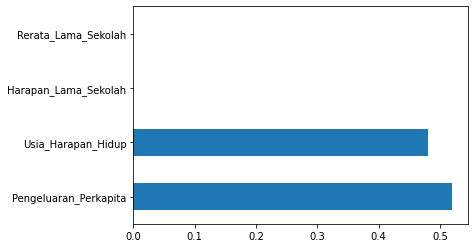

In [ ]:
feature_importances = pd.Series(model1.feature_importances_, index=X_train.columns)
feature_importances.nlargest(4).plot(kind='barh')
plt.show()

importance plot dari Adabost, menampilkan 2 fitur terpenting dalam membuat prediksi.
Hasil visualisasi diatas menjelaskan fitur berkontribusi pada prediksi akhir yang saling hubungan antara fitur dan target variabel.

In [ ]:
#Nilai akurasi yang diperoleh dari model Adaboost
print('Adaboost Model Accuracy:',accuracy_score(y_test,y_pred))

Adaboost Model Accuracy: 0.7465857359635811


RANDOOM FOREST

In [ ]:
#Inisialisasi model Random Forest dengan estimator sebanyak 50
RF = RandomForestClassifier(n_estimators=50, criterion="entropy", random_state=42)

In [ ]:
#Modelling Random Forest dari data training
model2 = RF.fit(X_train, y_train)

In [ ]:
#Inisialisasi hasil prediksi model Adaboost dari data testing dengan nama y_pred
y_pred2 = model2.predict(X_test)

In [ ]:
#Menampilkan hasil prediksi dari data testing
y_pred2

array([1, 2, 2, 1, 2, 2, 0, 3, 0, 2, 2, 2, 3, 0, 2, 0, 2, 2, 2, 0, 2, 1,
       0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 0, 2, 0, 3, 0, 2, 2, 3, 3, 2,
       2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 1, 0, 0, 0, 2, 2, 2,
       1, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 3, 2, 0, 0, 0, 3, 2,
       1, 0, 2, 3, 2, 2, 0, 2, 2, 0, 1, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2,
       0, 0, 2, 3, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2,
       2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 1, 0,
       2, 2, 2, 2, 0, 0, 0, 2, 2, 3, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0,
       0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 3, 2, 2, 0, 3, 2, 3, 0, 2, 0, 2, 2,
       3, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 3, 2, 2, 2, 2, 2,
       0, 0, 2, 2, 2, 3, 0, 2, 3, 3, 2, 2, 2, 1, 0, 0, 0, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 0, 3, 3, 0, 0,
       2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 3, 3, 2, 2,

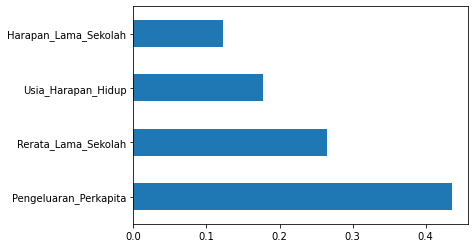

In [ ]:
feature_importances = pd.Series(model2.feature_importances_, index=X_train.columns)
feature_importances.nlargest(4).plot(kind='barh')
plt.show()

Importance Plot yang dihasilka dengan Random Forest menampilkan 4 fitur penting terhadap Indeks Pembangunan Manusia. dan yang paling tinggi yaitu Pengeluaran Perkapita

In [ ]:
#Nilai akurasi yang diperoleh dari model Random Forest
print('Random Forest Model Accuracy:',accuracy_score(y_test,y_pred2))

Random Forest Model Accuracy: 0.9620637329286799


KESIMPULAN



1.  Hasil akurasi Klasifikasi menggunakan Adaboost didapatkan yaitu Adaboost Model Accuracy: 0.7465857359635811
2.   Hasil akurasi klasifikasi menggunakan Random Forest didapatkan yaitu Random Forest Model Accuracy:  0.9620637329286799

Dari hasil tersebut dapat disimpulkan bahwa dalam melakukan klasifikasi Indeks Pembangunan Manusia Random Forest sangat bagus dalam melakukan evaluasi karena mendapatkan hasil akurasi yang baik.
Variable importance yang paling mempengaruhi Indeks Pengembangan Manusia (IPM) yaitu Pengeluaran Perkapita.

